<a href="https://www.kaggle.com/code/subhajeetdas/netflix-stock-price-prediction?scriptVersionId=125177972" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/netflix-stock-price-prediction/NFLX.csv


# Data Loading

In [2]:
df = pd.read_csv("/kaggle/input/netflix-stock-price-prediction/NFLX.csv")

In [3]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


# Data Preparation

In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df.shape

(1009, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1009.0,4.190597e+02,1.085375e+02,2.339200e+02,3.314900e+02,3.777700e+02,5.091300e+02,6.923500e+02
High,1009.0,4.253207e+02,1.092630e+02,2.506500e+02,3.363000e+02,3.830100e+02,5.156300e+02,7.009900e+02
Low,1009.0,4.123740e+02,1.075559e+02,2.312300e+02,3.260000e+02,3.708800e+02,5.025300e+02,6.860900e+02
Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Adj Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Volume,1009.0,7.570685e+06,5.465535e+06,1.144000e+06,4.091900e+06,5.934500e+06,9.322400e+06,5.890430e+07


In [8]:
train, test = train_test_split(df, test_size = 0.2)

In [9]:
test_pred = test.copy()

In [10]:
train.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
583,2020-06-01,418.829987,426.720001,415.980011,425.920013,425.920013,3743700
65,2018-05-09,328.790009,331.950012,327.510010,330.299988,330.299988,5633400
399,2019-09-06,293.350006,293.350006,287.029999,290.170013,290.170013,5166600
632,2020-08-10,493.350006,497.459991,478.630005,483.380005,483.380005,4691200
45,2018-04-11,302.880005,311.640015,301.820007,303.670013,303.670013,14877400
132,2018-08-14,342.089996,342.410004,336.250000,337.489990,337.489990,5805200
803,2021-04-15,544.169983,553.489990,542.659973,549.219971,549.219971,3139100
876,2021-07-29,519.960022,520.780029,513.789978,514.250000,514.250000,1736000
219,2018-12-18,263.299988,275.750000,263.290009,270.940002,270.940002,10350100
919,2021-09-29,589.010010,609.880005,588.010010,599.059998,599.059998,6221000


In [11]:
test.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
417,2019-10-02,263.609985,269.350006,262.190002,268.029999,268.029999,7659100
22,2018-03-08,322.200012,322.920013,314.130005,317.000000,317.000000,11340100
470,2019-12-17,307.359985,316.799988,306.600006,315.480011,315.480011,10427100
836,2021-06-02,499.820007,503.220001,495.820007,499.239990,499.239990,2269000
95,2018-06-21,421.380005,423.209991,406.369995,415.440002,415.440002,18389900
307,2019-04-26,368.350006,375.140015,366.239990,374.850006,374.850006,5621900
861,2021-07-08,530.929993,535.500000,529.090027,530.760010,530.760010,3269000
827,2021-05-19,481.630005,488.570007,478.540009,487.700012,487.700012,3349900
66,2018-05-10,331.500000,332.059998,327.339996,329.600006,329.600006,5302300
707,2020-11-24,478.839996,484.049988,475.890015,482.880005,482.880005,3550500


In [12]:
x_train = train[['Open', 'High', 'Low', 'Adj Close', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Adj Close', 'Volume']].values

In [13]:
y_train = train['Close'].values
y_test = test['Close'].values

# Linear Regression

In [14]:
model_lnr = LinearRegression()
model_lnr.fit(x_train, y_train)

LinearRegression()

In [15]:
y_pred = model_lnr.predict(x_test)

In [16]:
result = model_lnr.predict([[262.000000, 267.899994, 250.029999, 254.259995, 11896100]])
print(result)

[254.259995]


# Model Evaluation

In [17]:
print("MSE",round(mean_squared_error(y_test,y_pred), 4))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 4))
print("R2 Score : ", r2_score(y_test,y_pred))

MSE 0.0
RMSE 0.0
R2 Score :  1.0


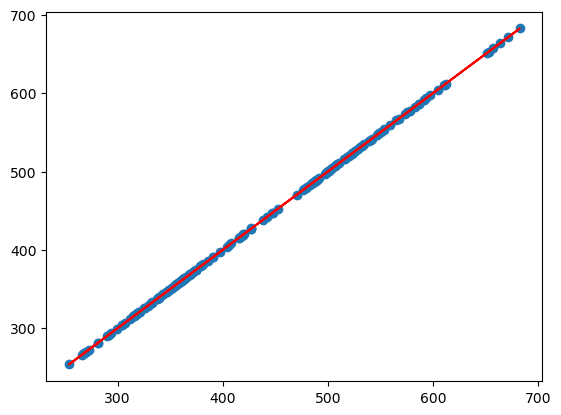

In [18]:
plt.scatter(y_pred, y_test)
plt.plot(y_pred, y_test, color='red')

In [19]:
test_pred['Close_Prediction'] = y_pred
test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
417,2019-10-02,263.609985,269.350006,262.190002,268.029999,268.029999,7659100,268.029999
22,2018-03-08,322.200012,322.920013,314.130005,317.000000,317.000000,11340100,317.000000
470,2019-12-17,307.359985,316.799988,306.600006,315.480011,315.480011,10427100,315.480011
836,2021-06-02,499.820007,503.220001,495.820007,499.239990,499.239990,2269000,499.239990
95,2018-06-21,421.380005,423.209991,406.369995,415.440002,415.440002,18389900,415.440002
...,...,...,...,...,...,...,...,...
334,2019-06-05,354.380005,357.880005,348.709991,355.730011,355.730011,5020100,355.730011
137,2018-08-21,331.000000,341.500000,329.700012,338.019989,338.019989,14783200,338.019989
935,2021-10-21,628.890015,654.010010,628.650024,653.159973,653.159973,8437100,653.159973
213,2018-12-10,264.190002,271.179993,260.609985,269.700012,269.700012,9605600,269.700012


In [20]:
test_pred[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,202.0,425.670494,102.1141,253.669998,349.147507,388.195007,506.894989,682.609985
Close_Prediction,202.0,425.670494,102.1141,253.669998,349.147507,388.195008,506.894989,682.609985
